In [298]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp 
import pandas_profiling  

In [299]:
#loading the dataset
df_cars = pd.read_excel("Assignment01.xlsx", sheet_name = "data" )

In [300]:
df_cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [301]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  Price              11914 non-null  int64  
dtypes: float64(3), int64(5

In [302]:
df_cars.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'Price'],
      dtype='object')

In [303]:
#Checking Duplicates 
df_cars.duplicated().sum()

715

In [304]:
#removing duplicates
df_cars = df_cars.drop_duplicates(ignore_index = True)

# Univariate Analysis

In [305]:
df_cars.describe(include = "all")

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
count,11199,11199,11199.000000,11196,11130.000000,11169.000000,11199,11199,11193.000000,7823,11199,11199,11199.000000,11199.000000,11199.000000,1.119900e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1083,156,NaN,6658,NaN,NaN,7932,4354,NaN,1075,4395,2843,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.714528,NaN,253.388859,5.665950,NaN,NaN,3.454123,NaN,NaN,NaN,26.610590,19.731851,1558.483347,4.192593e+04
std,NaN,NaN,7.228211,NaN,110.150938,1.797021,NaN,NaN,0.872946,NaN,NaN,NaN,8.977641,9.177555,1445.668872,6.153505e+04
min,NaN,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,172.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.159950e+04
50%,NaN,NaN,2015.000000,NaN,239.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,25.000000,18.000000,1385.000000,3.067500e+04
75%,NaN,NaN,2016.000000,NaN,303.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.303250e+04


In [ ]:
pandas_profiling.ProfileReport(df_cars)

### NA Value Treatment


In [306]:
#Number of Doors
df_cars['Number of Doors'].fillna(df_cars['Number of Doors'].mode()[0], inplace=True)

In [307]:
#Engine Fuel Type
df_cars['Engine Fuel Type'].fillna(df_cars['Engine Fuel Type'].mode()[0], inplace=True)

In [308]:
#Engine cylinders and Engine HP
df_cars = df_cars.fillna({'Engine Cylinders' : df_cars['Engine Cylinders'].ffill(),
                          'Engine HP' : df_cars['Engine HP'].ffill()})

In [309]:
df_cars.groupby(['Transmission Type']).agg(mod  = ('Market Category', lambda x: x.value_counts().index[0]))

,mod
Transmission Type,
AUTOMATED_MANUAL,"Exotic,High-Performance"
AUTOMATIC,Crossover
DIRECT_DRIVE,Hatchback
MANUAL,Hatchback
UNKNOWN,"Hatchback,Performance"


In [310]:
df_cars.groupby(['Vehicle Size']).agg(mod  = ('Market Category',lambda x: x.mode()))

,mod
Vehicle Size,
Compact,Hatchback
Large,Flex Fuel
Midsize,Crossover


In [311]:
df_cars.groupby(['Engine Fuel Type']).agg(mod = ('Market Category',lambda x: x.mode()))

,mod
Engine Fuel Type,
diesel,Diesel
electric,Hatchback
flex-fuel (premium unleaded recommended/E85),"Flex Fuel,Luxury"
flex-fuel (premium unleaded required/E85),"Flex Fuel,Luxury,High-Performance"
flex-fuel (unleaded/E85),Flex Fuel
flex-fuel (unleaded/natural gas),"Flex Fuel,Performance"
natural gas,[]
premium unleaded (recommended),Luxury
premium unleaded (required),"Luxury,Performance"


In [312]:
df_cars.groupby(['Engine Cylinders']).agg(mod = ('Market Category',lambda x: x.mode()))

,mod
Engine Cylinders,
0.0,Hatchback
3.0,Hatchback
4.0,Crossover
5.0,Luxury
6.0,Crossover
8.0,Flex Fuel
10.0,"Exotic,High-Performance"
12.0,"Exotic,High-Performance"
16.0,"Exotic,High-Performance"


In [313]:
#Market Category
df_cars['Market Category'] = df_cars.groupby(['Vehicle Size', 
                                    'Engine Cylinders'])['Market Category'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [314]:
df_cars.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
Price                0
dtype: int64

### Outlier Treatment

In [315]:
Outliers=df_cars.describe(percentiles=[.01, .02, .03, .04, .05,.06, .07, .08, .09, .95,.96, .97, .98,.99]).T
Outliers

,count,mean,std,min,1%,2%,3%,4%,5%,6%,7%,8%,9%,50%,95%,96%,97%,98%,99%,max
Year,11199.0,2010.714528,7.228211,1990.0,1991.0,1992.0,1993.0,1993.0,1994.0,1995.0,1996.00,1997.0,1998.0,2015.0,2017.0,2017.0,2017.0,2017.00,2017.00,2017.0
Engine HP,11199.0,253.302170,110.108518,55.0,90.0,99.0,107.0,114.0,120.0,125.0,130.00,132.0,137.0,240.0,467.0,510.0,540.0,565.08,621.00,1001.0
Engine Cylinders,11199.0,5.669167,1.797611,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.00,4.0,4.0,6.0,8.0,8.0,8.0,12.00,12.00,16.0
Number of Doors,11199.0,3.454416,0.872804,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,4.0,4.0,4.0,4.0,4.00,4.00,4.0
highway MPG,11199.0,26.610590,8.977641,12.0,15.0,16.0,16.0,17.0,17.0,17.0,18.00,18.0,18.0,25.0,38.0,39.0,40.0,42.00,46.00,354.0
city mpg,11199.0,19.731851,9.177555,7.0,10.0,11.0,12.0,12.0,12.0,13.0,13.00,13.0,13.0,18.0,29.0,30.0,31.0,36.00,44.06,137.0
Popularity,11199.0,1558.483347,1445.668872,2.0,26.0,61.0,86.0,155.0,155.0,190.0,190.00,190.0,204.0,1385.0,5657.0,5657.0,5657.0,5657.00,5657.00,5657.0
Price,11199.0,41925.927136,61535.047817,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2072.02,2242.0,2537.2,30675.0,112070.0,137532.0,182512.0,218536.00,290009.22,2065902.0


In [316]:
#Outliers_capping

#Price
df_cars["Price"][df_cars['Price'] >= 290009.22] = 290009.22


#Engine HP
df_cars["Engine HP"][df_cars["Engine HP"] <= 90] = 90
df_cars["Engine HP"][df_cars["Engine HP"] >= 621] = 621


#Highway MPG
df_cars['highway MPG'][df_cars["highway MPG"] >= 46.00] = 46.00


#city MPG
df_cars["city mpg"][df_cars["city mpg"] >= 44.06] = 44.06


#Popularity
df_cars["Popularity"][df_cars["Popularity"] <= 86.0] = 86.0



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\si



# Bivariate Analysis

In [317]:
df_cars.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'Price'],
      dtype='object')

<AxesSubplot:xlabel='Engine Fuel Type', ylabel='Price'>

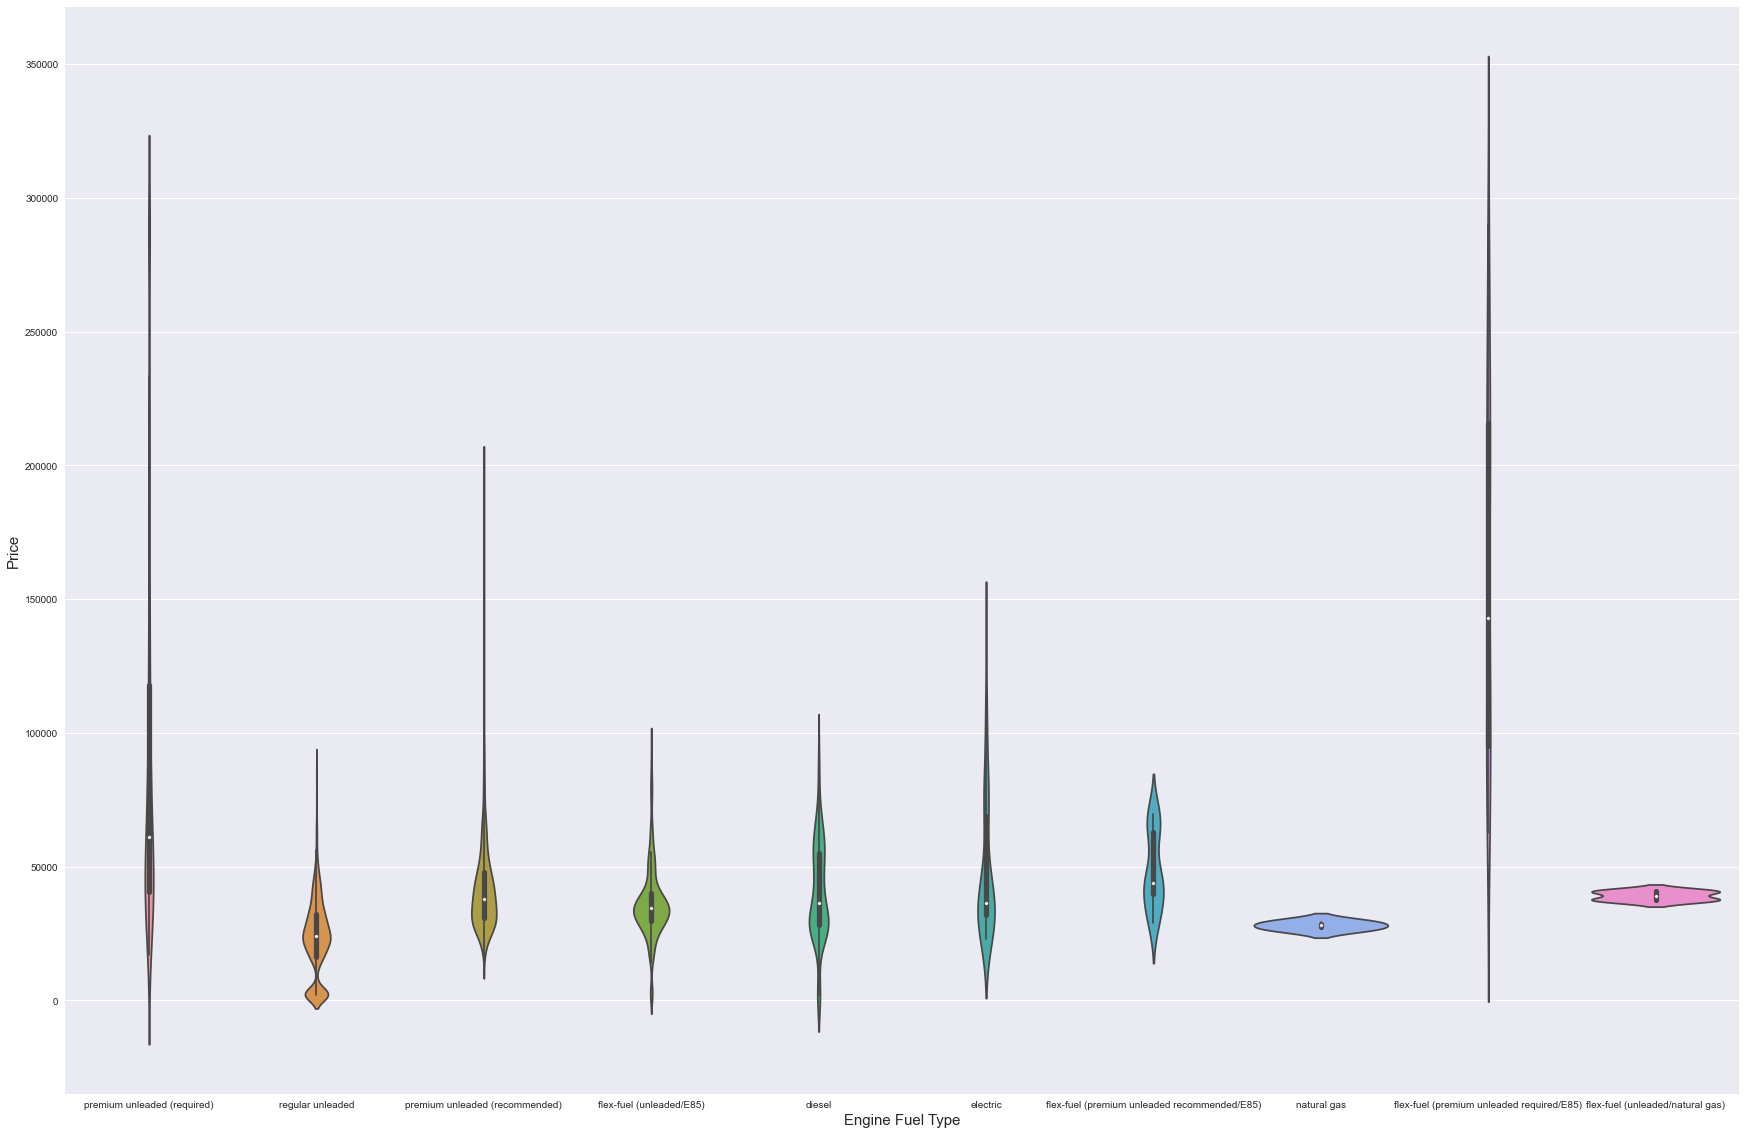

In [318]:
plt.figure(figsize=(30,20))
sns.violinplot(x="Engine Fuel Type", y="Price", data=df_cars)

<AxesSubplot:xlabel='Engine Cylinders', ylabel='Price'>

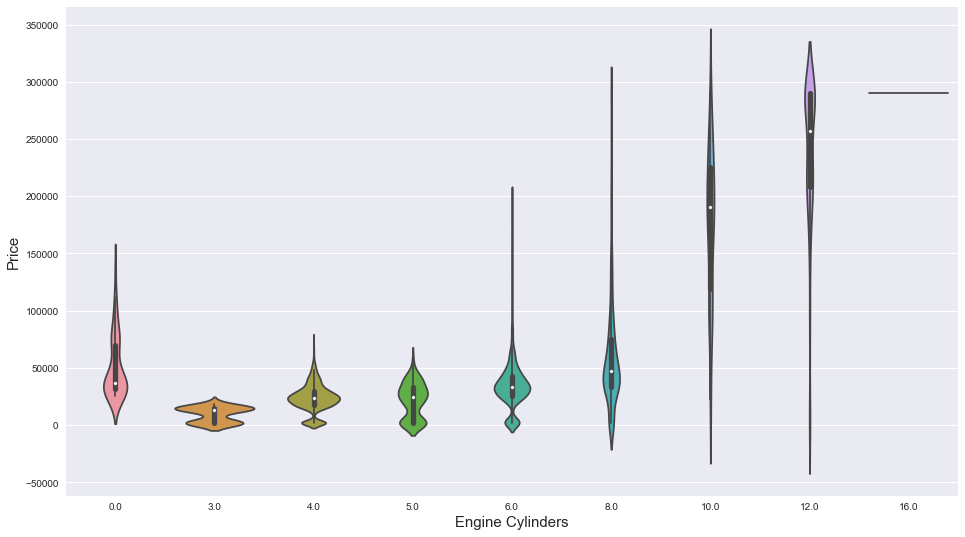

In [319]:
plt.figure(figsize=(16,9))
sns.violinplot(x="Engine Cylinders", y="Price", data=df_cars)

<AxesSubplot:xlabel='Transmission Type', ylabel='Price'>

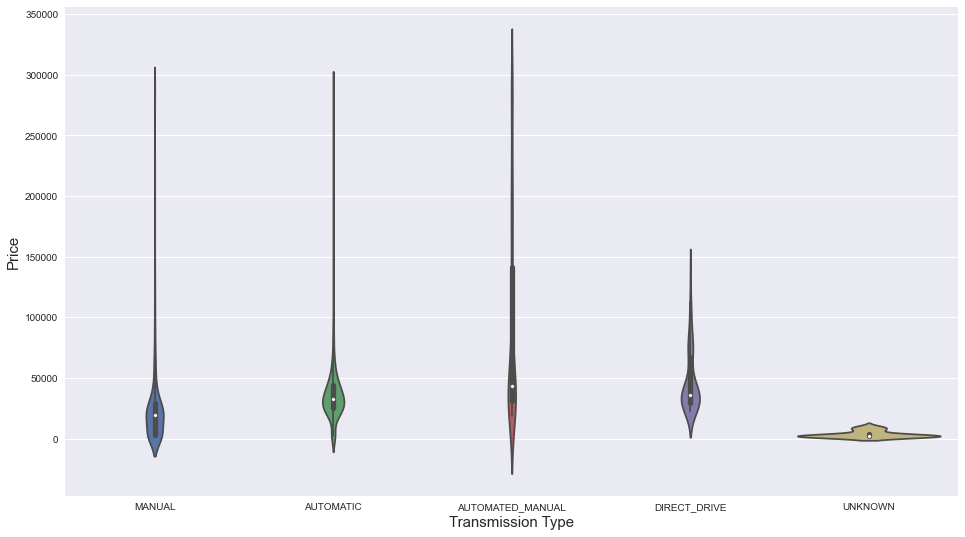

In [320]:
plt.figure(figsize=(16,9))
sns.violinplot(x="Transmission Type", y="Price", data=df_cars)

<AxesSubplot:xlabel='Driven_Wheels', ylabel='Price'>

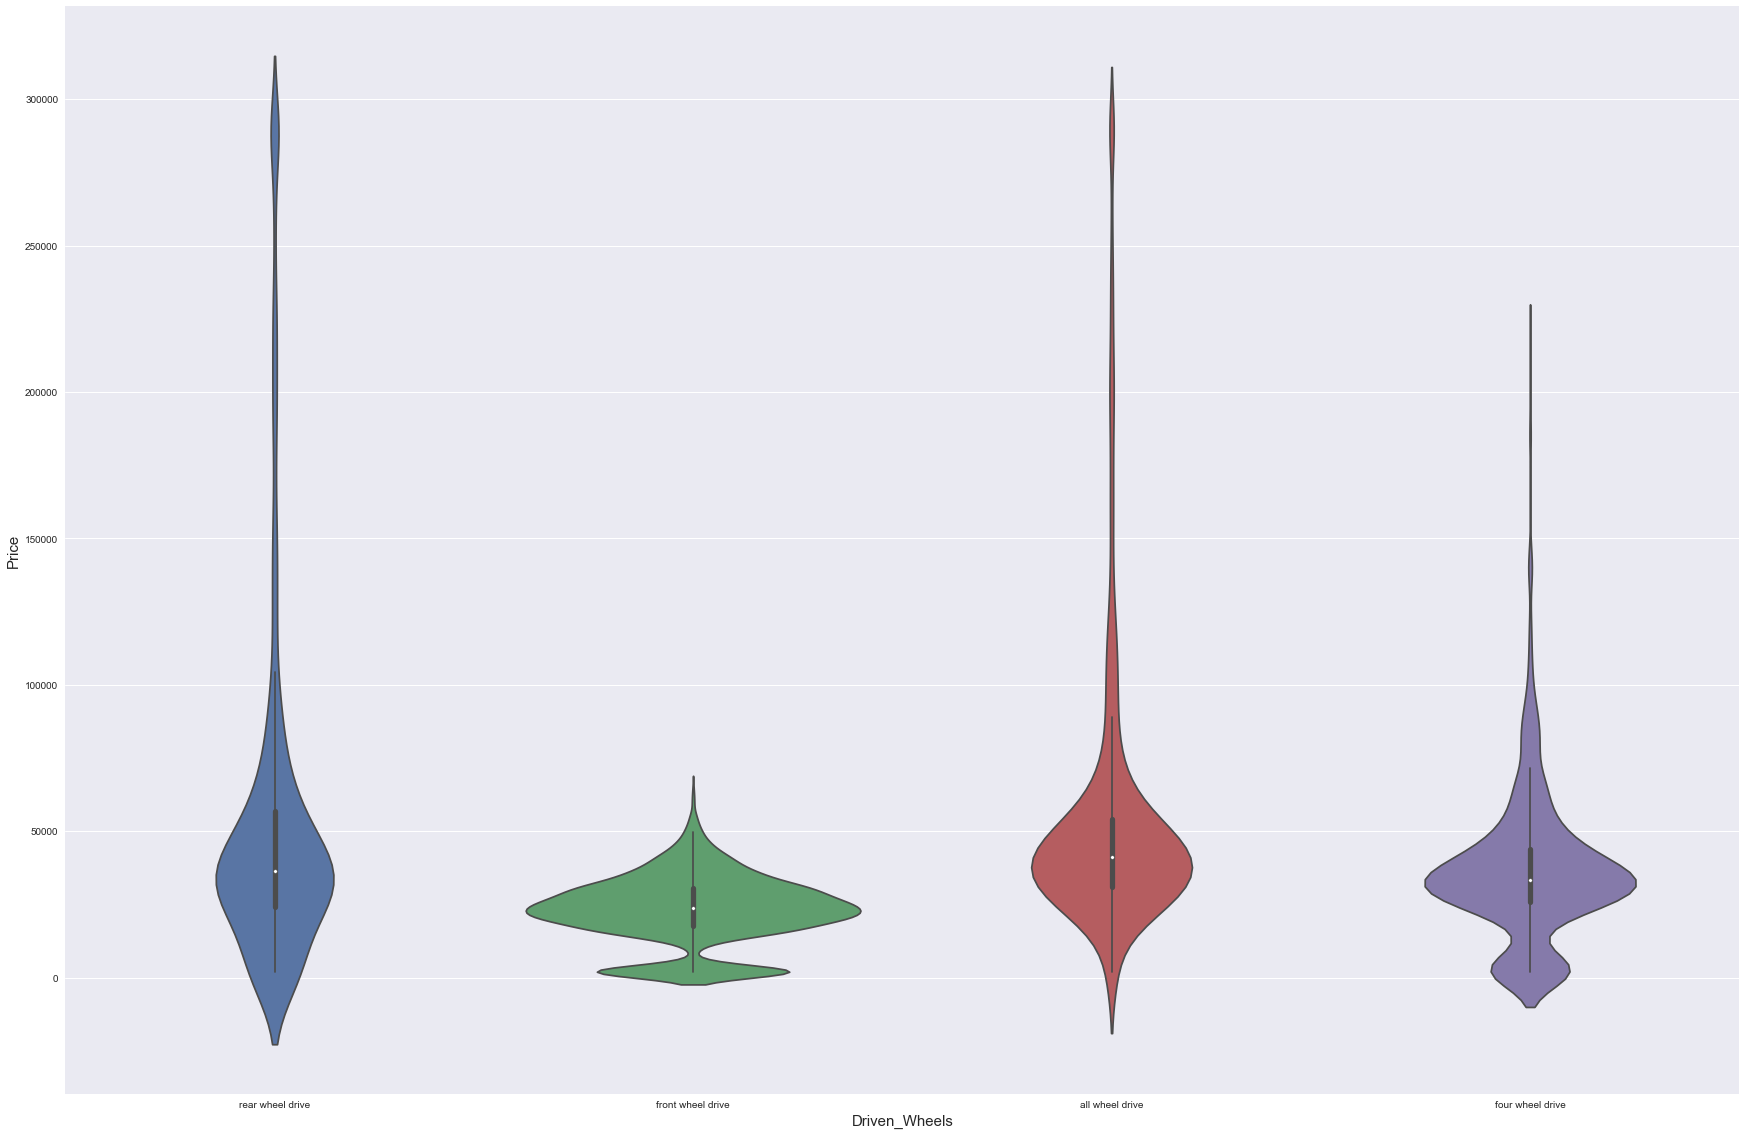

In [321]:
plt.figure(figsize=(30,20))
sns.violinplot(x="Driven_Wheels", y="Price", data=df_cars)

<AxesSubplot:xlabel='Number of Doors', ylabel='Price'>

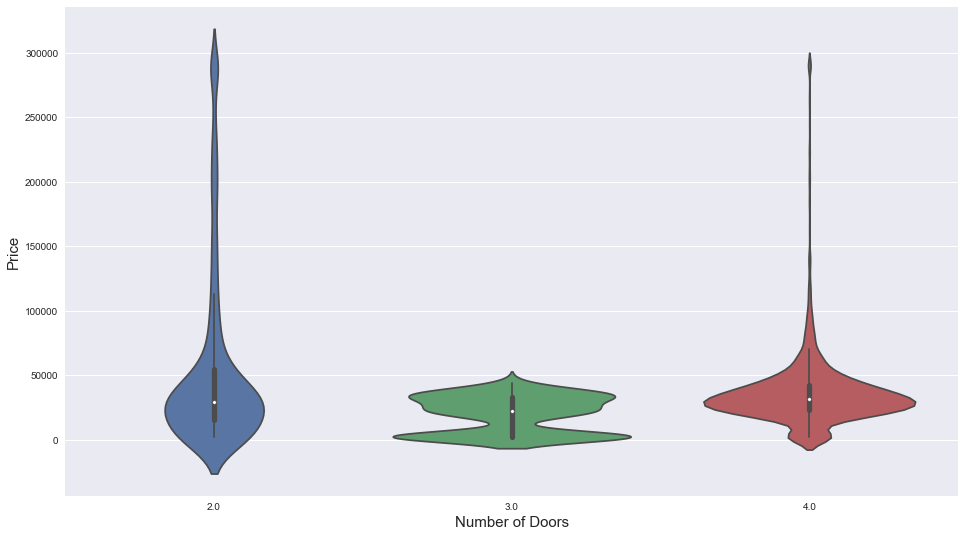

In [322]:
plt.figure(figsize=(16,9))
sns.violinplot(x="Number of Doors", y="Price", data=df_cars)

<AxesSubplot:xlabel='Vehicle Size', ylabel='Price'>

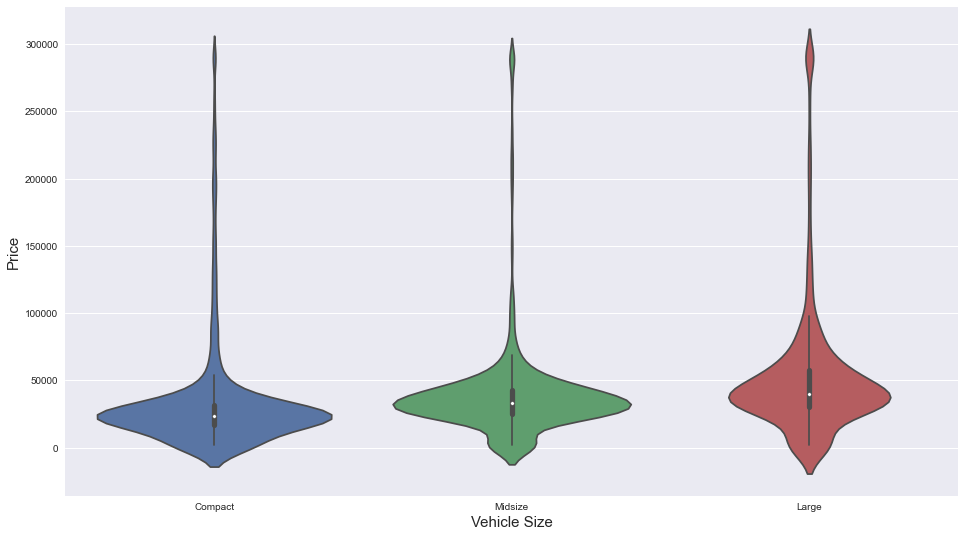

In [323]:
plt.figure(figsize=(16,9))
sns.violinplot(x="Vehicle Size", y="Price", data=df_cars)

<AxesSubplot:xlabel='Vehicle Style', ylabel='Price'>

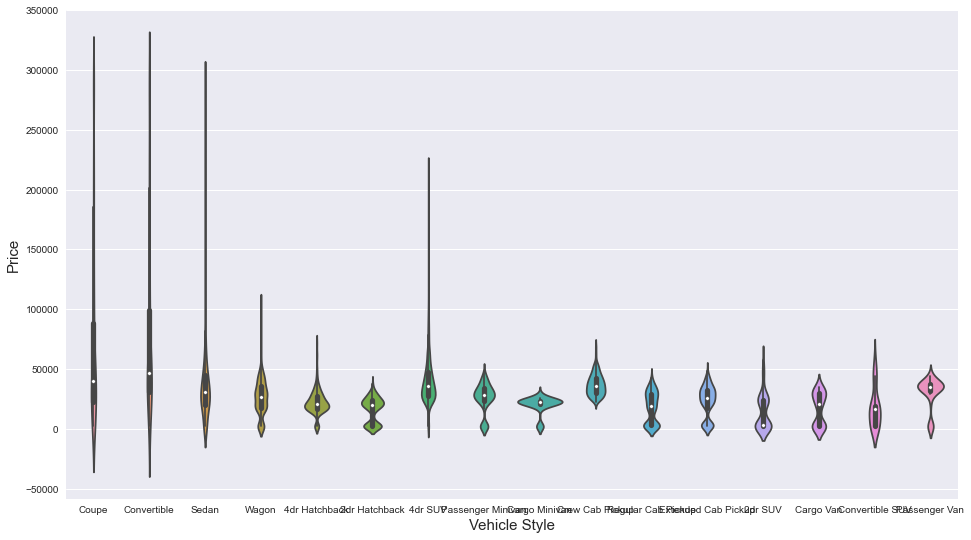

In [324]:
plt.figure(figsize=(16,9))
sns.violinplot(x="Vehicle Style", y="Price", data=df_cars)

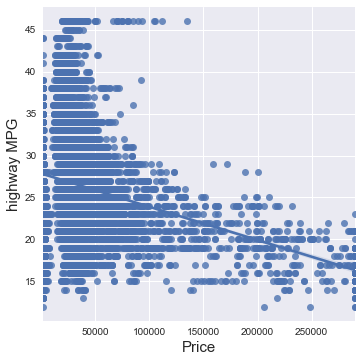

In [325]:
sns.lmplot(x="Price" , y="highway MPG", data=df_cars)

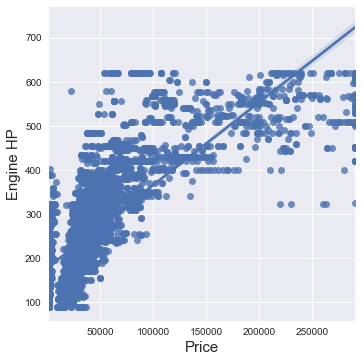

In [326]:
sns.lmplot(x="Price" , y="Engine HP", data=df_cars)

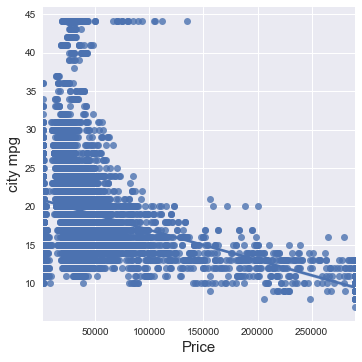

In [327]:
sns.lmplot(x="Price" , y="city mpg", data=df_cars)

In [328]:
corr_df_cars = df_cars.corr()
corr_df_cars.to_csv("Corr_cars.csv")

In [329]:
pd.set_option("precision",3)
corr_df_cars.style.background_gradient(cmap="coolwarm")

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Price
Year,1.000,0.338,-0.033,0.248,0.307,0.252,0.085,0.292
Engine HP,0.338,1.000,0.769,-0.126,-0.486,-0.529,0.039,0.771
Engine Cylinders,-0.033,0.769,1.000,-0.149,-0.697,-0.707,0.038,0.612
Number of Doors,0.248,-0.126,-0.149,1.000,0.133,0.154,-0.057,-0.167
highway MPG,0.307,-0.486,-0.697,0.133,1.000,0.926,-0.037,-0.275
city mpg,0.252,-0.529,-0.707,0.154,0.926,1.000,-0.016,-0.303
Popularity,0.085,0.039,0.038,-0.057,-0.037,-0.016,1.000,-0.047
Price,0.292,0.771,0.612,-0.167,-0.275,-0.303,-0.047,1.000


# Feature Engineering


In [330]:
df_cars["Combined mpg"] = 0.55*(df_cars["city mpg"]) + 0.45*(df_cars["highway MPG"])

In [331]:
df_cars["mileage_hp_ratio"] = df_cars["Combined mpg"]/df_cars["Engine HP"]

In [332]:
df_cars['popularity_range'] = np.where((df_cars['Popularity'] >= 3000), 'high',
                                        np.where((df_cars['Popularity'] < 3000) & (df_cars['Popularity'] >= 1000),'medium',
                                                np.where((df_cars['Popularity'] < 1000) ,'low','')))

In [333]:
df_cars['num_of_feature'] = df_cars['Market Category'].str.count(',') + 1

In [334]:
df_cars['Recency'] = 1/(2020 - df_cars['Year'])

In [335]:
df_cars.drop(["Year"], axis = 1, inplace = True)

# Feature Transformation

[]

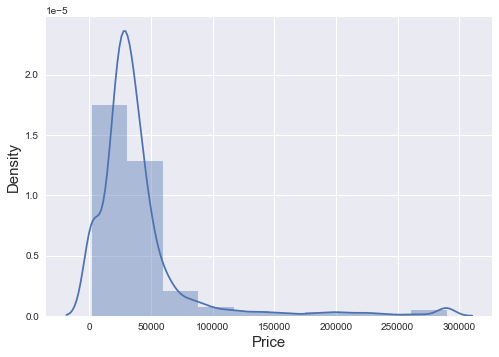

In [336]:
sns.distplot(df_cars['Price'], bins=10)
plt.plot()

Since, the graph is skewed.          
We will try to transform it to a proper normal distribution.

[]

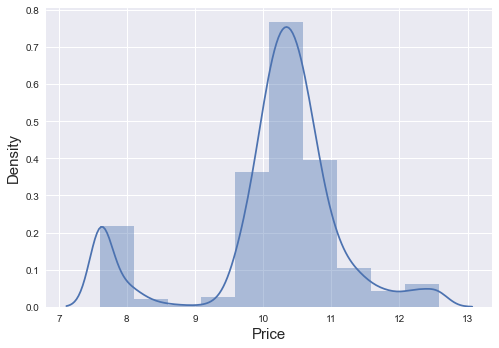

In [337]:
sns.distplot(np.log1p(df_cars['Price']), bins=10)
plt.plot()

In [338]:
df_cars["Price_log"] = np.log1p(df_cars["Price"])

In [339]:
df_cars["Vehicle Style"].value_counts()

Sedan                  2843
4dr SUV                2434
Coupe                  1175
Convertible             741
4dr Hatchback           663
Crew Cab Pickup         655
Extended Cab Pickup     597
Wagon                   562
2dr Hatchback           412
Passenger Minivan       389
Regular Cab Pickup      345
Passenger Van           121
2dr SUV                  91
Cargo Van                84
Cargo Minivan            59
Convertible SUV          28
Name: Vehicle Style, dtype: int64

In [340]:
df_cars['Vehicle Style'] = df_cars['Vehicle Style'].replace(['Passenger Van', 'Cargo Van','Cargo Minivan','Passenger Minivan'], 'Van')
df_cars['Vehicle Style'] = df_cars['Vehicle Style'].replace(['Convertible SUV', '2dr SUV','4dr SUV'], 'SUV')
df_cars['Vehicle Style'] = df_cars['Vehicle Style'].replace(['Regular Cab Pickup', 'Extended Cab Pickup','Crew Cab Pickup'], 'Cab')
df_cars['Vehicle Style'] = df_cars['Vehicle Style'].replace(['2dr Hatchback', '4dr Hatchback'], 'Hatchback')

In [341]:
df_cars['Engine Fuel Type'] = df_cars['Engine Fuel Type'].replace(['natural gas', 'flex-fuel (unleaded/natural gas)'], 'Natural')
df_cars['Engine Fuel Type'] = df_cars['Engine Fuel Type'].replace(['premium unleaded (required)', 'flex-fuel (premium unleaded required/E85)'], 'unleaded required')
df_cars['Engine Fuel Type'] = df_cars['Engine Fuel Type'].replace(['premium unleaded (recommended)', 'flex-fuel (premium unleaded recommended/E85)'], 'unleaded recommended')
df_cars['Engine Fuel Type'] = df_cars['Engine Fuel Type'].replace(['regular unleaded','flex-fuel (unleaded/E85)'], 'unleaded')

In [342]:
df_mar_cat= df_cars['Market Category'].str.join(sep='').str.get_dummies(sep=',')

Seperating categorical and numerical features

In [343]:
df_numeric_features = df_cars.select_dtypes(include=[np.number])
df_numeric_features.columns

Index(['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG',
       'city mpg', 'Popularity', 'Price', 'Combined mpg', 'mileage_hp_ratio',
       'num_of_feature', 'Recency', 'Price_log'],
      dtype='object')

In [344]:
df_numeric_features.drop(["Price"], axis = 1, inplace = True)
df_numeric_features.columns

C:\Users\SANKALP\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG',
       'city mpg', 'Popularity', 'Combined mpg', 'mileage_hp_ratio',
       'num_of_feature', 'Recency', 'Price_log'],
      dtype='object')

In [345]:
df_cat_features = df_cars.select_dtypes(include=[object])
df_cat_features.columns

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'popularity_range'],
      dtype='object')

In [346]:
df_cat_features.drop(["Make", "Model", "Market Category"], axis = 1, inplace = True)
df_cat_features.columns

Index(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels',
       'Vehicle Size', 'Vehicle Style', 'popularity_range'],
      dtype='object')

In [347]:
#Dummy variables
for col in  df_cat_features.columns.values:
    one_hot_encoded_variables = pd.get_dummies(df_cat_features[col],prefix=col)
    df_cat_features = pd.concat([df_cat_features,one_hot_encoded_variables],axis=1)
    df_cat_features.drop([col],axis=1, inplace=True)

In [348]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_numeric_features = pd.DataFrame(min_max.fit_transform(df_numeric_features.iloc[:,0:10]),
columns = df_numeric_features.iloc[:,0:10].columns.tolist())

In [349]:
#Finally, combining alll the columns
df_cars_final = pd.concat([df_cat_features, df_numeric_features,df_mar_cat, df_cars["Price_log"]], axis = 1)

In [350]:
df_cars_final

,Engine Fuel Type_Natural,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_unleaded,Engine Fuel Type_unleaded recommended,Engine Fuel Type_unleaded required,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,...,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance,Price_log
0,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,10.739
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,10.613
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,10.501
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,10.290
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,10.449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,10.739
11195,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,10.945
11196,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,10.832
11197,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,10.838


In [351]:
from sklearn.model_selection import train_test_split
X = df_cars_final.drop(["Price_log"], axis = 1)
Y = df_cars_final["Price_log"]


In [352]:
import statsmodels.api as sm  # Statical learning
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit() 
print(model.summary())
# R-squared:                       0.703
# Adj. R-squared:                  0.702

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     643.2
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:51:26   Log-Likelihood:                -9684.4
No. Observations:               11199   AIC:                         1.945e+04
Df Residuals:                   11157   BIC:                         1.976e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [353]:
#Checking for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('vif_value', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif_value,features
25,inf,Vehicle Style_Van
22,inf,Vehicle Style_Hatchback
24,inf,Vehicle Style_Sedan
1,inf,Engine Fuel Type_Natural
26,inf,Vehicle Style_Wagon
27,inf,popularity_range_high
28,inf,popularity_range_low
29,inf,popularity_range_medium
33,inf,highway MPG
34,inf,city mpg


In [354]:
X.columns

Index(['const', 'Engine Fuel Type_Natural', 'Engine Fuel Type_diesel',
       'Engine Fuel Type_electric', 'Engine Fuel Type_unleaded',
       'Engine Fuel Type_unleaded recommended',
       'Engine Fuel Type_unleaded required',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle Size_Compact',
       'Vehicle Size_Large', 'Vehicle Size_Midsize', 'Vehicle Style_Cab',
       'Vehicle Style_Convertible', 'Vehicle Style_Coupe',
       'Vehicle Style_Hatchback', 'Vehicle Style_SUV', 'Vehicle Style_Sedan',
       'Vehicle Style_Van', 'Vehicle Style_Wagon', 'popularity_range_high',
       'popularity_range_low', 'popularity_range_medium', 'Engine HP',
       'Engine Cylinders', 'Number of Doors', 'highway MPG

In [356]:
#Removing variables to remove multicollinearity
X= X[['const', 'Engine Fuel Type_Natural', 'Engine Fuel Type_diesel',
       'Engine Fuel Type_electric', 'Engine Fuel Type_unleaded',
       'Engine Fuel Type_unleaded recommended',
       'Engine Fuel Type_unleaded required',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle Size_Compact',
       'Vehicle Size_Large', 'Vehicle Size_Midsize', 'Vehicle Style_Cab',
       'Vehicle Style_Convertible', 'Vehicle Style_Coupe',
       'Vehicle Style_Hatchback', 
       'Vehicle Style_SUV',
       'Vehicle Style_Sedan', #'Vehicle Style_Van',
       'Vehicle Style_Wagon', 'popularity_range_high', 'popularity_range_low',
       'popularity_range_medium', 'Engine HP', 'Engine Cylinders',
       'Number of Doors', 'highway MPG', 'city mpg', 'Popularity',
       'Combined mpg', 'mileage_hp_ratio', 'num_of_feature', 'Recency',
       'Crossover', 'Diesel', 'Exotic', 'Factory Tuner', 'Flex Fuel',
       'Hatchback', 'High-Performance', 'Hybrid', 'Luxury', 'Performance']]


model = sm.OLS(Y, X).fit() 
print(model.summary())
# R-squared:                       0.703 (no significant change)
# Adj. R-squared:                  0.702

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     643.2
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:52:39   Log-Likelihood:                -9684.4
No. Observations:               11199   AIC:                         1.945e+04
Df Residuals:                   11157   BIC:                         1.976e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [357]:
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('vif_value', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif_value,features
48,inf,Performance
26,inf,popularity_range_high
46,inf,Hybrid
45,inf,High-Performance
44,inf,Hatchback
43,inf,Flex Fuel
1,inf,Engine Fuel Type_Natural
42,inf,Factory Tuner
27,inf,popularity_range_low
18,inf,Vehicle Size_Midsize


In [244]:
X= X[['const', 'Engine Fuel Type_Natural', 'Engine Fuel Type_diesel',
       'Engine Fuel Type_electric', 'Engine Fuel Type_unleaded',
       'Engine Fuel Type_unleaded recommended',
       'Engine Fuel Type_unleaded required',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle Size_Compact',
       'Vehicle Size_Large', 'Vehicle Size_Midsize', 'Vehicle Style_Cab',
       'Vehicle Style_Convertible', 'Vehicle Style_Coupe',
       'Vehicle Style_Hatchback', 
       'Vehicle Style_SUV',
       'Vehicle Style_Sedan', #'Vehicle Style_Van', #'Performance'
       'Vehicle Style_Wagon', 'popularity_range_high', 'popularity_range_low',
       'popularity_range_medium', 'Engine HP', 'Engine Cylinders',
       'Number of Doors', 'highway MPG', 'city mpg', 'Popularity',
       'Combined mpg', 'mileage_hp_ratio', 'num_of_feature', 'Recency',
       'Crossover', 'Diesel', 'Exotic', 'Factory Tuner', 'Flex Fuel',
       'Hatchback', 'High-Performance', 'Hybrid', 'Luxury']]


model = sm.OLS(Y, X).fit() 
print(model.summary())
# R-squared:                       0.678 (no significant change)
# Adj. R-squared:                  0.677

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     643.2
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:11:49   Log-Likelihood:                -9684.4
No. Observations:               11199   AIC:                         1.945e+04
Df Residuals:                   11157   BIC:                         1.976e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [358]:
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('vif_value', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif_value,features
48,inf,Performance
26,inf,popularity_range_high
46,inf,Hybrid
45,inf,High-Performance
44,inf,Hatchback
43,inf,Flex Fuel
1,inf,Engine Fuel Type_Natural
42,inf,Factory Tuner
27,inf,popularity_range_low
18,inf,Vehicle Size_Midsize


In [359]:
#continuing in similar way

X = X[['const',  'Engine Fuel Type_diesel',
       'Engine Fuel Type_electric', #'Engine Fuel Type_unleaded',
       'Engine Fuel Type_unleaded recommended',
       'Engine Fuel Type_unleaded required',
       'Transmission Type_AUTOMATED_MANUAL', #'Transmission Type_AUTOMATIC','popularity_range_high',
        'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', #'Vehicle Size_Compact','Driven_Wheels_four wheel drive', 'High-Performance',
       'Vehicle Size_Large', 'Vehicle Size_Midsize', #'Vehicle Style_Cab',
       'Vehicle Style_Convertible', 'Vehicle Style_Coupe',
       'Vehicle Style_Hatchback', 
       'Vehicle Style_SUV',#'Transmission Type_DIRECT_DRIVE','Engine Fuel Type_Natural','city mpg',
       'Vehicle Style_Sedan', #'Vehicle Style_Van', #'Performance' 'popularity_range_low','Combined mpg',
       'Vehicle Style_Wagon', 
       'popularity_range_medium', 'Engine HP', #'Engine Cylinders',
       'Number of Doors', 'highway MPG',  #'Popularity', 'Luxury'
        'mileage_hp_ratio', 'num_of_feature', 'Recency',
       'Crossover', 'Diesel', 'Exotic', 'Factory Tuner', 'Flex Fuel',
       'Hatchback',  'Hybrid']]


model = sm.OLS(Y, X).fit() 
print(model.summary())
# R-squared:                       0.702(no significant change)
# Adj. R-squared:                  0.701

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     821.6
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:53:23   Log-Likelihood:                -9699.6
No. Observations:               11199   AIC:                         1.947e+04
Df Residuals:                   11166   BIC:                         1.971e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [360]:
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('vif_value', ascending=False)

,vif_value,features
0,48.469,const
22,7.701,highway MPG
23,7.301,mileage_hp_ratio
20,6.198,Engine HP
9,5.026,Driven_Wheels_front wheel drive
17,4.212,Vehicle Style_Sedan
1,4.179,Engine Fuel Type_diesel
27,3.995,Diesel
14,3.529,Vehicle Style_Coupe
31,3.393,Hatchback


### Multicollinearity is removed 

In [361]:
#prediction
pred_price = model.predict(X)
pred_price

0        10.198
1        10.651
2        10.359
3         9.960
4        10.309
          ...  
11194    10.858
11195    10.858
11196    10.858
11197    10.612
11198     9.483
Length: 11199, dtype: float64

In [362]:
#Transforming back the features
pred_price_1 = np.exp(pred_price)
Y_1 = np.exp(Y) 

In [363]:
from sklearn import metrics # use to evaluate the model 
print('Mean Absolute Error :', metrics.mean_absolute_error(Y_1, pred_price_1))  
print('Mean Squared Error :', metrics.mean_squared_error(Y_1, pred_price_1))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(Y_1, pred_price_1)))

Mean Absolute Error : 13233.444852067061
Mean Squared Error : 702622770.9918059
Root Mean Squared Error : 26507.032481811424


# Diagnosis of linear regression

In [364]:
##Residual vs Fitted plot
model_y = model.fittedvalues

### Checking linearity  

Text(0, 0.5, 'Residuals')

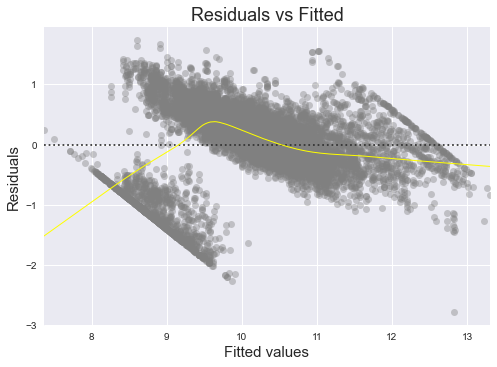

In [365]:
plt.style.use('seaborn')

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns

pl_A = plt.figure()
pl_A.axes[0] = sns.residplot(model_y, df_cars_final["Price_log"], data=df_cars_final,
                          lowess=True,
                          scatter_kws={'color': 'grey','alpha': 0.4},
                          line_kws={'color': 'yellow', 'lw': 1, 'alpha': 1.0})

pl_A.axes[0].set_title('Residuals vs Fitted')
pl_A.axes[0].set_xlabel('Fitted values')
pl_A.axes[0].set_ylabel('Residuals')

As the yellow line is not horizontal, we can say our assumption of linearity about data is not true.       
This maybe due to prescence of outliers

### Checking Normality

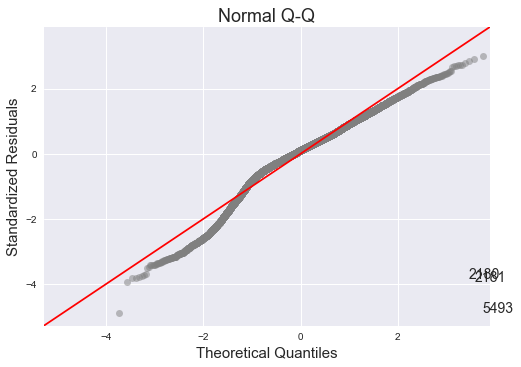

In [253]:
#Normal qqplot
model_residuals = model.resid
model_norm_residuals = model.get_influence().resid_studentized_internal

QQ = ProbPlot(model_norm_residuals)
pl_B = QQ.qqplot(line='45', alpha=0.5, color='grey', lw=1)
pl_B.axes[0].set_title('Normal Q-Q')
pl_B.axes[0].set_xlabel('Theoretical Quantiles')
pl_B.axes[0].set_ylabel('Standardized Residuals');

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    pl_B.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]))

Few points towards the tail-end drift away from the straight line.   
Thus, our data is not perfectly normal

Text(0, 0.5, '$sqrt{|Standardized Residuals|}')

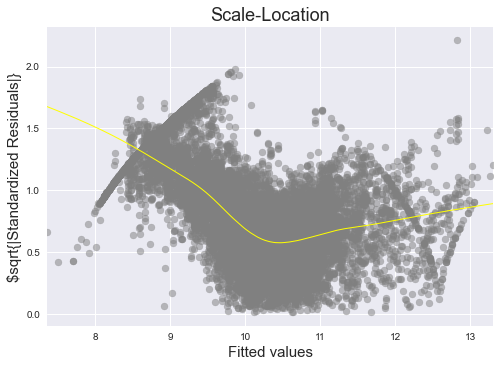

In [366]:
#Scale-Location plot
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)

pl_F = plt.figure()
plt.scatter(model_y, model_norm_residuals_abs_sqrt, color='grey', alpha=0.5);
sns.regplot(model_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'yellow', 'lw': 1, 'alpha': 1.0});
pl_F.axes[0].set_title('Scale-Location')
pl_F.axes[0].set_xlabel('Fitted values')
pl_F.axes[0].set_ylabel('$sqrt{|Standardized Residuals|}')

### Detecting outliers and leverage points

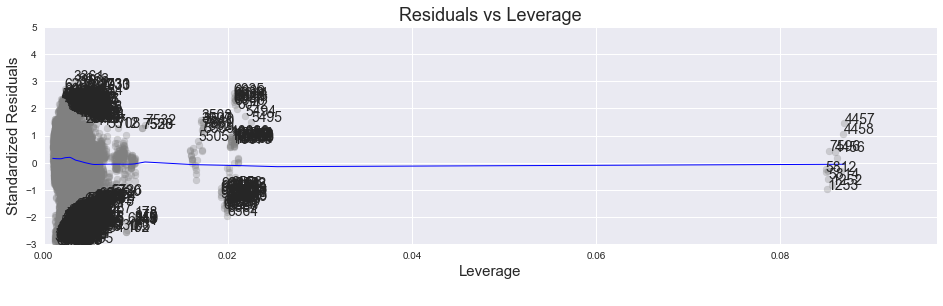

In [367]:
###Residual vs leverage plot
model_leverage = model.get_influence().hat_matrix_diag
model_cooks = model.get_influence().cooks_distance[0]

pl_C = plt.figure(figsize=(16,4));
plt.scatter(model_leverage, model_norm_residuals, color='grey', alpha=0.3);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'blue', 'lw': 1, 'alpha': 1.0});
pl_C.axes[0].set_xlim(0, max(model_leverage)+0.01)
pl_C.axes[0].set_ylim(-3, 5)
pl_C.axes[0].set_title('Residuals vs Leverage')
pl_C.axes[0].set_xlabel('Leverage')
pl_C.axes[0].set_ylabel('Standardized Residuals');


leverage_top_800 = np.flip(np.argsort(model_cooks), 0)[:800]
for i in leverage_top_800:
    pl_C.axes[0].annotate(i,
                                xy=(model_leverage[i],
                                    model_norm_residuals[i]));

In [368]:
leverage_top_800

array([ 5493,  4457,  6035,  6039,  6044,  6036,  6038,  6041,  6043,
        4458,  6037,  6040,  1253,  6042,  6564,  5494,  6567,  1252,
        6568,   175,   162,   522,  6571,   163,  2181,  6563,  5495,
         244,  6559,  2180,  2177,   243,  1332,   245,  6566,  8045,
        8043,  8048,  6558,   760,   754,  2646,  2731,  2730,   765,
        6859,  2733,   246,  3508,   170,  4030,   521,  6555,  2639,
        6569,  2636,   178,  3507,  6560,  3510,  2654,  1330,   520,
        6562,  2754,  2637,   764,   756,   849,   749,   855,  2641,
        3363,  7040,  6337,  9248,   653,  7039,  7860,  5814,  8018,
        1331,  9484,  8019,   850, 10006,  3361,  6554,  3362, 10684,
        7731,  7861,  6339,  6192,  6193,  7931,  2645,  6338,   853,
        4194,  3660,  2638,  2172,  6341,  8017,  3155,  3130,   651,
        3129,  6025,  6022,  3659,  6021,  7930,  2650,  7222,  8020,
        9486,  3140,  9485,  9247,  8847,   766, 10003,  6340,  3360,
         864, 10680,

In [369]:
#Removing ouliers from the data
X_no_out = X.drop(index = leverage_top_800, inplace = False)
Y_no_out = Y.drop(index = leverage_top_800, inplace = False)

In [370]:
X_no_out = X_no_out.reset_index()
Y_no_out = Y_no_out.reset_index()

In [371]:
Y_no_out = Y_no_out["Price_log"]


In [372]:
X_no_out.columns

Index(['index', 'const', 'Engine Fuel Type_diesel',
       'Engine Fuel Type_electric', 'Engine Fuel Type_unleaded recommended',
       'Engine Fuel Type_unleaded required',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_front wheel drive', 'Driven_Wheels_rear wheel drive',
       'Vehicle Size_Large', 'Vehicle Size_Midsize',
       'Vehicle Style_Convertible', 'Vehicle Style_Coupe',
       'Vehicle Style_Hatchback', 'Vehicle Style_SUV', 'Vehicle Style_Sedan',
       'Vehicle Style_Wagon', 'popularity_range_medium', 'Engine HP',
       'Number of Doors', 'highway MPG', 'mileage_hp_ratio', 'num_of_feature',
       'Recency', 'Crossover', 'Diesel', 'Exotic', 'Factory Tuner',
       'Flex Fuel', 'Hatchback', 'Hybrid'],
      dtype='object')

In [373]:
X_no_out = X_no_out[['const',  'Engine Fuel Type_diesel',
       'Engine Fuel Type_electric', #'Engine Fuel Type_unleaded',
       'Engine Fuel Type_unleaded recommended',
       'Engine Fuel Type_unleaded required',
       'Transmission Type_AUTOMATED_MANUAL', #'Transmission Type_AUTOMATIC','popularity_range_high',
        'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', #'Vehicle Size_Compact','Driven_Wheels_four wheel drive', 'High-Performance',
       'Vehicle Size_Large', 'Vehicle Size_Midsize', #'Vehicle Style_Cab',
       'Vehicle Style_Convertible', 'Vehicle Style_Coupe',
       'Vehicle Style_Hatchback', 
       'Vehicle Style_SUV',#'Transmission Type_DIRECT_DRIVE','Engine Fuel Type_Natural','city mpg',
       'Vehicle Style_Sedan', #'Vehicle Style_Van', #'Performance' 'popularity_range_low','Combined mpg',
       'Vehicle Style_Wagon', 
       'popularity_range_medium', 'Engine HP', #'Engine Cylinders',
       'Number of Doors', 'highway MPG',  #'Popularity', 'Luxury'
        'mileage_hp_ratio', 'num_of_feature', 'Recency',
       'Crossover', 'Diesel', 'Exotic', 'Factory Tuner', 'Flex Fuel',
       'Hatchback',  'Hybrid']]


model = sm.OLS(Y_no_out, X_no_out).fit() 
print(model.summary())
# R-squared:                       0.770
# Adj. R-squared:                  0.769

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     1085.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:00:25   Log-Likelihood:                -6236.4
No. Observations:               10399   AIC:                         1.254e+04
Df Residuals:                   10366   BIC:                         1.278e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

#### R-squared improved significantly 

In [375]:
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(X_no_out.values, i) for i in range(X_no_out.shape[1])]
vif["features"] = X_no_out.columns
vif.sort_values('vif_value', ascending=False)

,vif_value,features
0,51.363,const
1,8.996,Engine Fuel Type_diesel
27,8.737,Diesel
22,8.171,highway MPG
23,8.007,mileage_hp_ratio
20,6.415,Engine HP
9,5.154,Driven_Wheels_front wheel drive
17,4.417,Vehicle Style_Sedan
14,3.714,Vehicle Style_Coupe
31,3.507,Hatchback


In [376]:
pred_price = model.predict(X_no_out)
pred_price

0        10.278
1        10.693
2        10.395
3        10.022
4        10.371
          ...  
10394    10.963
10395    10.963
10396    10.963
10397    10.756
10398     9.821
Length: 10399, dtype: float64

In [377]:
#Transforming back the features
pred_price_1 = np.exp(pred_price)
Y_1 = np.exp(Y_no_out)

In [378]:
from sklearn import metrics # use to evaluate the model 
print('Mean Absolute Error :', metrics.mean_absolute_error(Y_1, pred_price_1))  
print('Mean Squared Error :', metrics.mean_squared_error(Y_1, pred_price_1))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(Y_1, pred_price_1)))

Mean Absolute Error : 10629.568091477315
Mean Squared Error : 395477304.430402
Root Mean Squared Error : 19886.611185176876


In [379]:
X = X_no_out
Y = Y_no_out

# Linear model using sklearn

In [380]:
X = X[[#'const',  
    'Engine Fuel Type_diesel',
       'Engine Fuel Type_electric', #'Engine Fuel Type_unleaded',
       'Engine Fuel Type_unleaded recommended',
       'Engine Fuel Type_unleaded required',
       'Transmission Type_AUTOMATED_MANUAL', #'Transmission Type_AUTOMATIC','popularity_range_high',
        'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', #'Vehicle Size_Compact','Driven_Wheels_four wheel drive', 'High-Performance',
       'Vehicle Size_Large', 'Vehicle Size_Midsize', #'Vehicle Style_Cab',
       'Vehicle Style_Convertible', 'Vehicle Style_Coupe',
       'Vehicle Style_Hatchback', 
       'Vehicle Style_SUV',#'Transmission Type_DIRECT_DRIVE','Engine Fuel Type_Natural','city mpg',
       'Vehicle Style_Sedan', #'Vehicle Style_Van', #'Performance' 'popularity_range_low','Combined mpg',
       'Vehicle Style_Wagon', 
       'popularity_range_medium', 'Engine HP', #'Engine Cylinders',
       'Number of Doors', #'highway MPG',  #'Popularity', 'Luxury'
        'mileage_hp_ratio', 'num_of_feature', 'Recency',
       'Crossover', 'Diesel', 'Exotic', 'Factory Tuner', 'Flex Fuel',
       'Hatchback',  'Hybrid']]


In [381]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .3, random_state = 88)
LR = LinearRegression() 


In [382]:
LR.fit(xTrain, yTrain)  # We are training our model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [383]:
LR.intercept_

9.013921820661436

In [384]:
LR.coef_

array([ 5.64315242e-01,  4.27433263e-01,  2.99003836e-01,  4.81067992e-01,
       -1.35105080e-01, -4.56919860e-01, -1.58136202e+00,  5.95567498e-02,
        1.24710721e-01, -5.46119569e-02, -1.50604383e-01, -1.82619650e-01,
        6.81152297e-01,  4.20795588e-01,  1.98851391e-01,  7.88814013e-04,
       -1.90599558e-02,  1.72605095e-01,  1.45134682e-02,  2.02272087e+00,
        4.99788052e-01, -9.83251719e-01, -1.08500218e-01,  6.08767354e-01,
        1.46811847e-01,  2.23581615e-01,  7.11018217e-01, -2.35440777e-01,
        5.43086279e-02,  2.24000947e-02,  4.73478849e-01])

In [385]:
y_pred= LR.predict(xTrain)
y_act = yTrain

In [386]:
y_pred= np.exp(y_pred)
y_act = np.exp(y_act)

In [387]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(y_act, y_pred))  
print('Mean Squared Error :', metrics.mean_squared_error(y_act, y_pred))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_act, y_pred)))

Mean Absolute Error : 10542.574014671494
Mean Squared Error : 370725208.3651503
Root Mean Squared Error : 19254.225727490324


In [388]:
SS_Residual = sum((y_act-y_pred)**2)
SS_Total = sum((y_act-np.mean(y_act))**2)
#r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared=(SS_Total-SS_Residual)/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(yTrain)-1)/(len(yTrain)-xTrain.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.7953223086655934 0.7944467727981495


In [389]:
LR.fit(xTest, yTest)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [390]:
y_pred_1= LR.predict(xTest)
y_act_1 = yTest

In [391]:
y_pred_1= np.exp(y_pred_1)
y_act_1 = np.exp(y_act_1)

In [392]:
print('Mean Absolute Error :', metrics.mean_absolute_error(y_act_1, y_pred_1))  
print('Mean Squared Error :', metrics.mean_squared_error(y_act_1, y_pred_1))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_act_1, y_pred_1)))

Mean Absolute Error : 10840.415985362704
Mean Squared Error : 397478154.5944895
Root Mean Squared Error : 19936.854179997645


In [393]:
SS_Residual = sum((y_act_1-y_pred_1)**2)
SS_Total = sum((y_act_1-np.mean(y_pred_1))**2)
#r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared=(SS_Total-SS_Residual)/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(yTest)-1)/(len(yTest)-xTest.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.808559124457657 0.8066372762899716


### R-squared close to .80 for both test and train 

# Linear model using SDGRegressor

In [394]:
import numpy as np
from sklearn.linear_model import SGDRegressor
lin_model = SGDRegressor()
# we fit our model with train data
lin_model.fit(xTrain, yTrain)
# we use predict() to predict our values
lin_model_predictions = lin_model.predict(xTest)
# we check the coefficient of determination with score()
print(lin_model.score(xTest,yTest))

0.7363067638161622


In [395]:
price_pred = np.exp(lin_model_predictions)
price_act_yTest = np.exp(yTest)

In [396]:
# we check the root mean square error (RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(price_act_yTest, price_pred)
rmse = np.sqrt(mse)
print(rmse)

26224.922862738487


# Best RMSE 

In [397]:
# ignore the deprecation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import GridSearchCV

# Grid search - this will take about 1 minute.
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(lin_model, param_grid)
clf.fit(xTrain, yTrain)
print("Best score: " + str(clf.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

Best score: 0.7423585699089028


In [398]:
pred_test = clf.predict(xTest)

In [399]:
print('Best C:',clf.best_estimator_.C) 
print('Best alpha:',clf.best_estimator_.alpha) 
print('Best n_iter:',clf.best_estimator_.n_iter_ )
print('Best tol:',clf.best_estimator_.tol) 
print('Best eta0:',clf.best_estimator_.eta0) 
print('Best learning rate:',clf.best_estimator_.learning_rate) 

Best C: 1.0
Best alpha: 0.0001
Best n_iter: 9
Best tol: 0.001
Best eta0: 0.01
Best learning rate: constant


In [400]:
linreg_SGD = SGDRegressor(loss='squared_loss', alpha=0.00001, penalty='l2',eta0=0.01,learning_rate='constant',max_iter=5)

In [401]:

warnings.filterwarnings("ignore", category=DeprecationWarning)

linreg_SGD.fit(xTrain,yTrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=1e-05, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=5,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [402]:
pred_test = linreg_SGD.predict(xTest)

In [403]:
pred_test = np.exp(pred_test)
price_act_yTest

4887    24950.0
2346    19696.0
8988    37241.0
1408    23996.0
5324    25961.0
         ...   
8060    49991.0
3728     2001.0
7455    19496.0
6047    47671.0
6036    35191.0
Name: Price_log, Length: 3120, dtype: float64

In [404]:
mse = mean_squared_error(price_act_yTest, pred_test)
rmse = np.sqrt(mse)
print(rmse)

20026.121370459845


In [405]:
print(linreg_SGD.score(xTest,yTest))

0.7397288773886606
